In [14]:
import pandas as pd
import pickle
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score

In [15]:
df = pd.read_csv('/kaggle/input/sample-dataset/sample data.csv')
df.head(3)


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,03-01-2000,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,04-01-2000,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,05-01-2000,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links


In [16]:
headlines = []

cleaned_df = df.copy()

cleaned_df.replace('[^a-zA-Z]', ' ',regex=True,inplace=True)
cleaned_df.replace('[ ]+', ' ',regex=True,inplace=True)


for row in range(len(df)):
    headlines.append(' '.join(str(x) for x in cleaned_df.iloc[row,2:]).lower())

In [17]:
cv = CountVectorizer(ngram_range=(2,2))
cv.fit(headlines)


CountVectorizer(ngram_range=(2, 2))

In [18]:
headlines[0]

'a hindrance to operations extracts from the leaked reports scorecard hughes instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes leeds pay the penalty hammers hand robson a youthful lesson saints party like it s  wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit  flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [29]:
train_data = cleaned_df[df['Date']<'20150101']
test_data = cleaned_df[df['Date']>'20141231']

train_data_len = len(train_data)

train_headlines = cv.transform(headlines[:train_data_len])
test_headlines = cv.transform(headlines[train_data_len:])

In [30]:
rfc = RandomForestClassifier(n_estimators=200,criterion='entropy')

rfc.fit(train_headlines,train_data['Label'])

preds = rfc.predict(test_headlines)

print(accuracy_score(test_data['Label'],preds))
confusion_matrix(test_data['Label'],preds)

0.5121776504297995


array([[ 46, 647],
       [ 34, 669]])

In [31]:
joblib.dump(rfc, 'stock_sentiment.pkl')

['stock_sentiment.pkl']

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

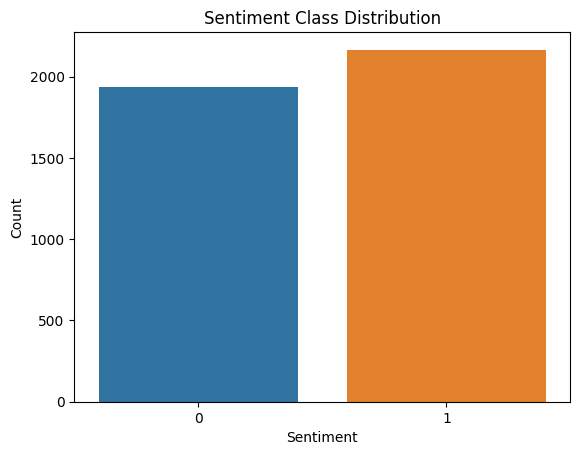

In [33]:
sns.countplot(x='Label', data=df)
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

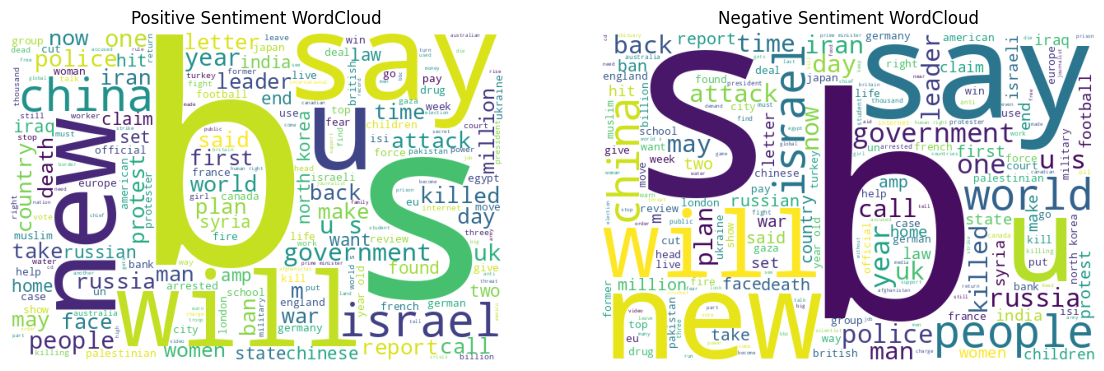

In [34]:
pos_text = ' '.join([h for i, h in enumerate(headlines) if df['Label'][i] == 1])
neg_text = ' '.join([h for i, h in enumerate(headlines) if df['Label'][i] == 0])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
wc_pos = WordCloud(width=600, height=400, background_color='white').generate(pos_text)
plt.imshow(wc_pos)
plt.axis('off')
plt.title("Positive Sentiment WordCloud")

plt.subplot(1,2,2)
wc_neg = WordCloud(width=600, height=400, background_color='white').generate(neg_text)
plt.imshow(wc_neg)
plt.axis('off')
plt.title("Negative Sentiment WordCloud")
plt.show()

In [27]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(headlines, df['Label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
y_pred = lr_model.predict(X_test_tfidf)

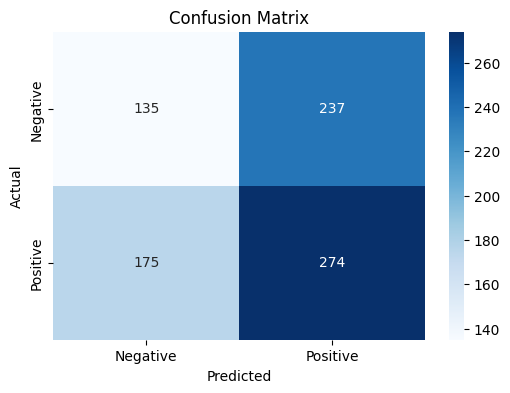

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.36      0.40       372
           1       0.54      0.61      0.57       449

    accuracy                           0.50       821
   macro avg       0.49      0.49      0.48       821
weighted avg       0.49      0.50      0.49       821



In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))